# Naive Bayes

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from pathlib import Path
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, label_binarize

In [48]:
# Import dataset
dataset = Path('../dataset')
df = pd.read_csv(dataset/'accidents_clean_train.csv')
df.head()

,Area_accident_occured,Types_of_Junction,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident,Day_of_week,Sex_of_driver,Age_band_of_driver,Accident_severity
0,Residential areas,No junction,Daylight,2,2,Moving Backward,Monday,Male,18-30,Slight Injury
1,Office areas,No junction,Daylight,2,2,Overtaking,Monday,Male,31-50,Slight Injury
2,Recreational areas,No junction,Daylight,2,2,Changing lane to the left,Monday,Male,18-30,Serious Injury
3,Office areas,Y Shape,Darkness - lights lit,2,2,Changing lane to the right,Sunday,Male,18-30,Slight Injury
4,Industrial areas,Y Shape,Darkness - lights lit,2,2,Overtaking,Sunday,Male,18-30,Slight Injury


In [19]:
df.shape

(8210, 10)

In [20]:
# Encode cat features using LabelEncoder
# label_encoders = {}
# for col in df.columns: 
#     if df[col].dtype == 'object':
#         le = LabelEncoder()
#         df[col] = le.fit_transform(df[col])
#         label_encoders[col] = le

df.head()

,Area_accident_occured,Types_of_Junction,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident,Day_of_week,Sex_of_driver,Age_band_of_driver,Accident_severity
0,Residential areas,No junction,Daylight,2,2,Moving Backward,Monday,Male,18-30,Slight Injury
1,Office areas,No junction,Daylight,2,2,Overtaking,Monday,Male,31-50,Slight Injury
2,Recreational areas,No junction,Daylight,2,2,Changing lane to the left,Monday,Male,18-30,Serious Injury
3,Office areas,Y Shape,Darkness - lights lit,2,2,Changing lane to the right,Sunday,Male,18-30,Slight Injury
4,Industrial areas,Y Shape,Darkness - lights lit,2,2,Overtaking,Sunday,Male,18-30,Slight Injury


## Prepare data

In [49]:
# Add mapped column where Accident Severity is binary (Slight Injury vs Serious/Fatal)
df['Accident_severity_mapped'] = df['Accident_severity'].map({'Slight Injury': 0}).fillna(1).astype(int)
# Features and target
X = df.drop(['Accident_severity', 'Accident_severity_mapped'], axis=1)
# Create binary target
y = df['Accident_severity']
y_mapped = df['Accident_severity_mapped']
# Convert to dummy vars
X = pd.get_dummies(X)
X.head()

,Number_of_vehicles_involved,Number_of_casualties,Area_accident_occured_ Market areas,Area_accident_occured_ Recreational areas,Area_accident_occured_ Church areas,Area_accident_occured_ Hospital areas,Area_accident_occured_ Industrial areas,Area_accident_occured_ Outside rural areas,Area_accident_occured_Office areas,Area_accident_occured_Other,...,Day_of_week_Tuesday,Day_of_week_Wednesday,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown
0,2,2,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
1,2,2,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,2,2,False,True,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
3,2,2,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
4,2,2,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [50]:
df.head()

,Area_accident_occured,Types_of_Junction,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident,Day_of_week,Sex_of_driver,Age_band_of_driver,Accident_severity,Accident_severity_mapped
0,Residential areas,No junction,Daylight,2,2,Moving Backward,Monday,Male,18-30,Slight Injury,0
1,Office areas,No junction,Daylight,2,2,Overtaking,Monday,Male,31-50,Slight Injury,0
2,Recreational areas,No junction,Daylight,2,2,Changing lane to the left,Monday,Male,18-30,Serious Injury,1
3,Office areas,Y Shape,Darkness - lights lit,2,2,Changing lane to the right,Sunday,Male,18-30,Slight Injury,0
4,Industrial areas,Y Shape,Darkness - lights lit,2,2,Overtaking,Sunday,Male,18-30,Slight Injury,0


## Split Data

### Accident_severity: Slight Injury, Serious Injury, Fatal

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# Train model
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)

CategoricalNB()

In [52]:
# Predict and view results
y_pred = nb_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.8583028826634186
Confusion Matrix:
 [[   1    0   21]
 [   2    3  325]
 [   1    0 2110]]
Classification Report:
                 precision    recall  f1-score   support

  Fatal injury       0.25      0.05      0.08        22
Serious Injury       1.00      0.01      0.02       330
 Slight Injury       0.86      1.00      0.92      2111

      accuracy                           0.86      2463
     macro avg       0.70      0.35      0.34      2463
  weighted avg       0.87      0.86      0.80      2463



### Accident severity: Slight Injury (0), Serious/Fatal (1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, 
                                                    test_size=0.3, 
                                                    random_state=42)

nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)


print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.8595209094600081
Confusion Matrix:
 [[2110    1]
 [ 345    7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      2111
           1       0.88      0.02      0.04       352

    accuracy                           0.86      2463
   macro avg       0.87      0.51      0.48      2463
weighted avg       0.86      0.86      0.80      2463



## Resample target variable

In [54]:
from imblearn.over_sampling import RandomOverSampler

In [55]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y_mapped)

# Check distribution
print(y_resampled.value_counts())

Accident_severity_mapped
0    7082
1    7082
Name: count, dtype: int64


## Train model - resampled

In [56]:
nb_model1 = CategoricalNB()
nb_model1.fit(X_resampled, y_resampled)

CategoricalNB()

In [57]:
y_pred1 = nb_model1.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))

Accuracy:  0.6000812017864393
Confusion Matrix:
 [[1284  827]
 [ 158  194]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.61      0.72      2111
           1       0.19      0.55      0.28       352

    accuracy                           0.60      2463
   macro avg       0.54      0.58      0.50      2463
weighted avg       0.79      0.60      0.66      2463



## AUC-ROC Score

In [58]:
y_probs = nb_model.predict_proba(X_test)

In [59]:
# Calculate AUC-ROC score
auc_score = roc_auc_score(y_test, y_probs, multi_class='ovr')
auc_score1 = roc_auc_score(y_test, y_probs, multi_class='ovo')
print(f"AUC-ROC Score: {auc_score:.4f}")
print(f"AUC-ROC1 Score: {auc_score1:.4f}")

ValueError: y should be a 1d array, got an array of shape (2463, 2) instead.

In [96]:
y_probs
y_test

3139    Slight Injury
3409    Slight Injury
1374    Slight Injury
1545    Slight Injury
8164    Slight Injury
            ...      
422     Slight Injury
1220    Slight Injury
3203    Slight Injury
3826    Slight Injury
7670    Slight Injury
Name: Accident_severity, Length: 2463, dtype: object

In [93]:
# Binarize the output
n_classes = y_probs.shape[1]
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\xxkjx\miniconda3\envs\mambaML\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


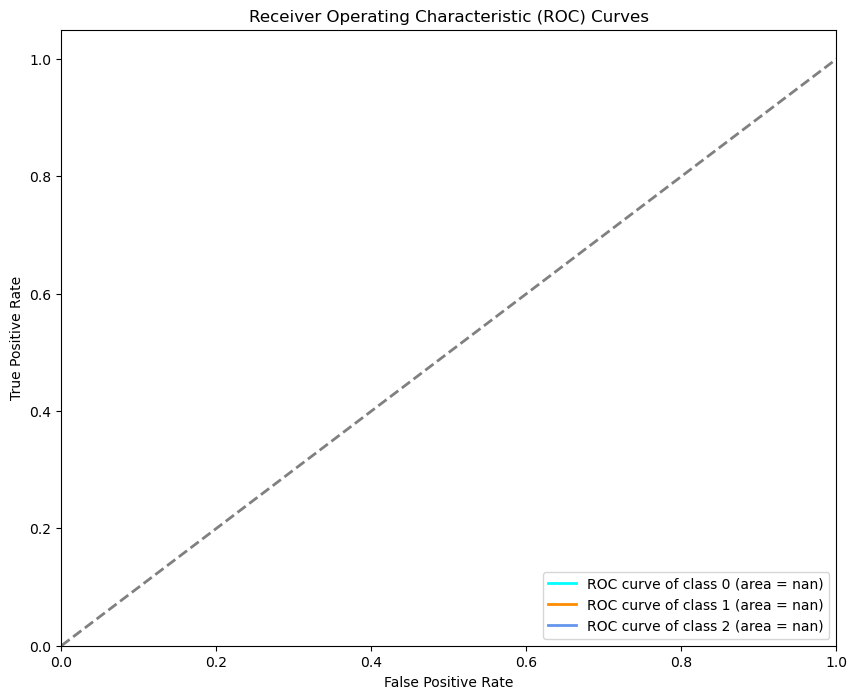

In [97]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [98]:
print("Class distribution in y_test:")
print(pd.Series(y_test).value_counts())


Class distribution in y_test:
Accident_severity
Slight Injury     2111
Serious Injury     330
Fatal injury        22
Name: count, dtype: int64
